# Imports

In [1]:
import pickle
import pandas as pd
import numpy as np
from numpy import mean

# identification of ARIMA parameters
from statsmodels.tsa.stattools import acf, pacf # choose p and q

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]

# custom functions
import sys
sys.path.append(r"C:\Users\User\Documents\projects\LHL_final_project_influenza_forecasting\src")
from evaluate_model import *
from ADF import *
from arima_model import *

# Datasets

In [3]:
df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))

# Choosing ARIMA Parameters

In [4]:
# test for stationarity - choose d
test_stationarity(df_flu_pre_COVID)

Results of Dickey-Fuller Test:
Test Statistic                  -4.008630
p-value                          0.001366
#Lags Used                       6.000000
Number of Observations Used    228.000000
Critical Value (1%)             -3.459361
Critical Value (5%)             -2.874302
Critical Value (10%)            -2.573571
dtype: float64


In [7]:
d = 0 # time series is stationary, so don't need to apply differencing

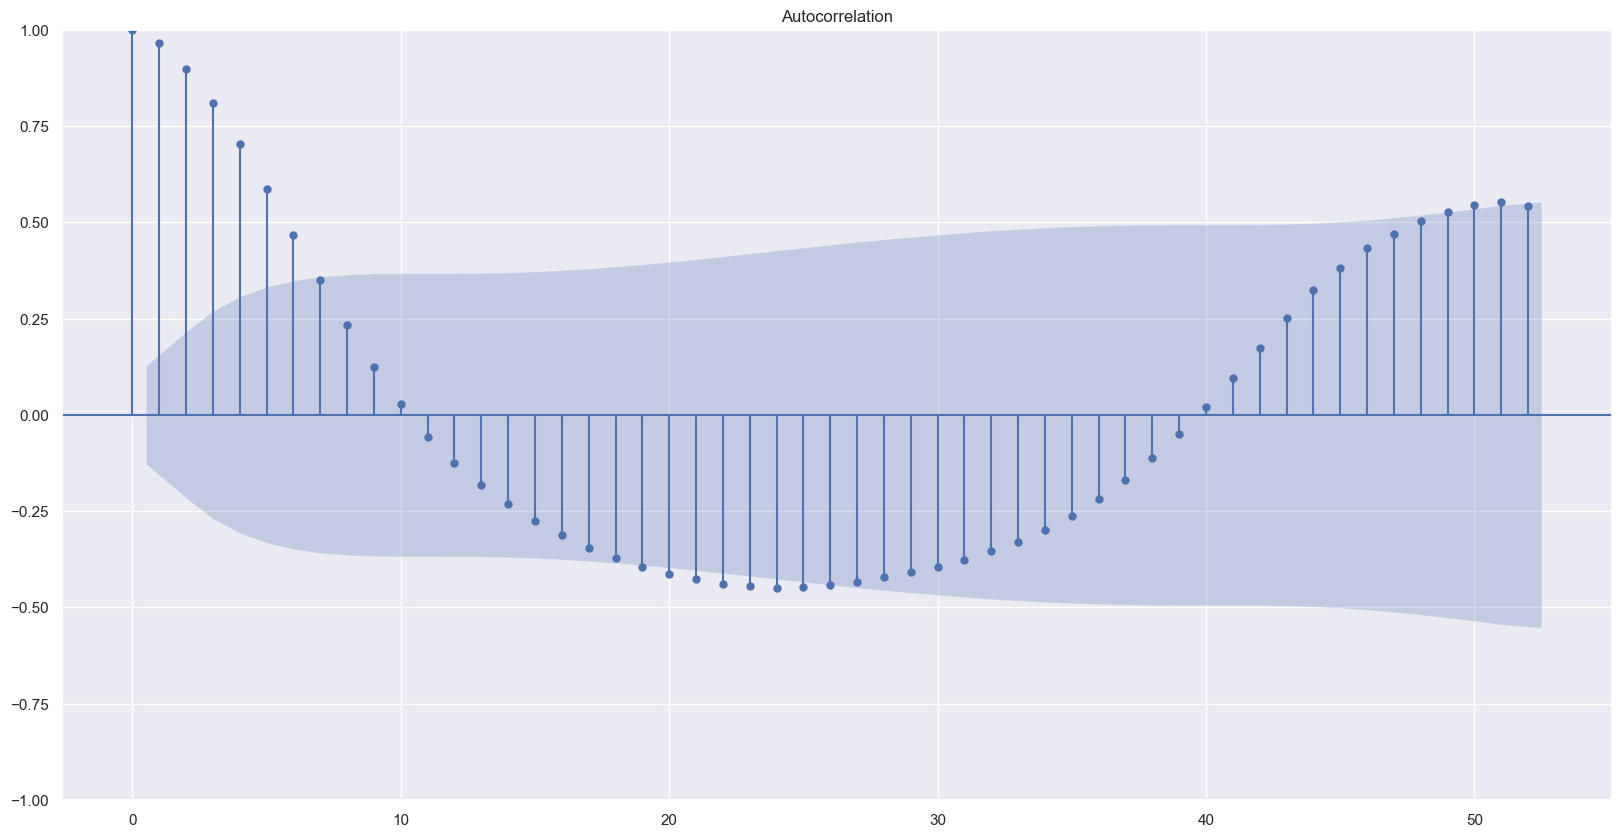

In [8]:
# plot acf and specify the number of lags - choose q
sm.graphics.tsa.plot_acf(df_flu_pre_COVID, lags=52)
plt.show()

In [9]:
q = 6

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


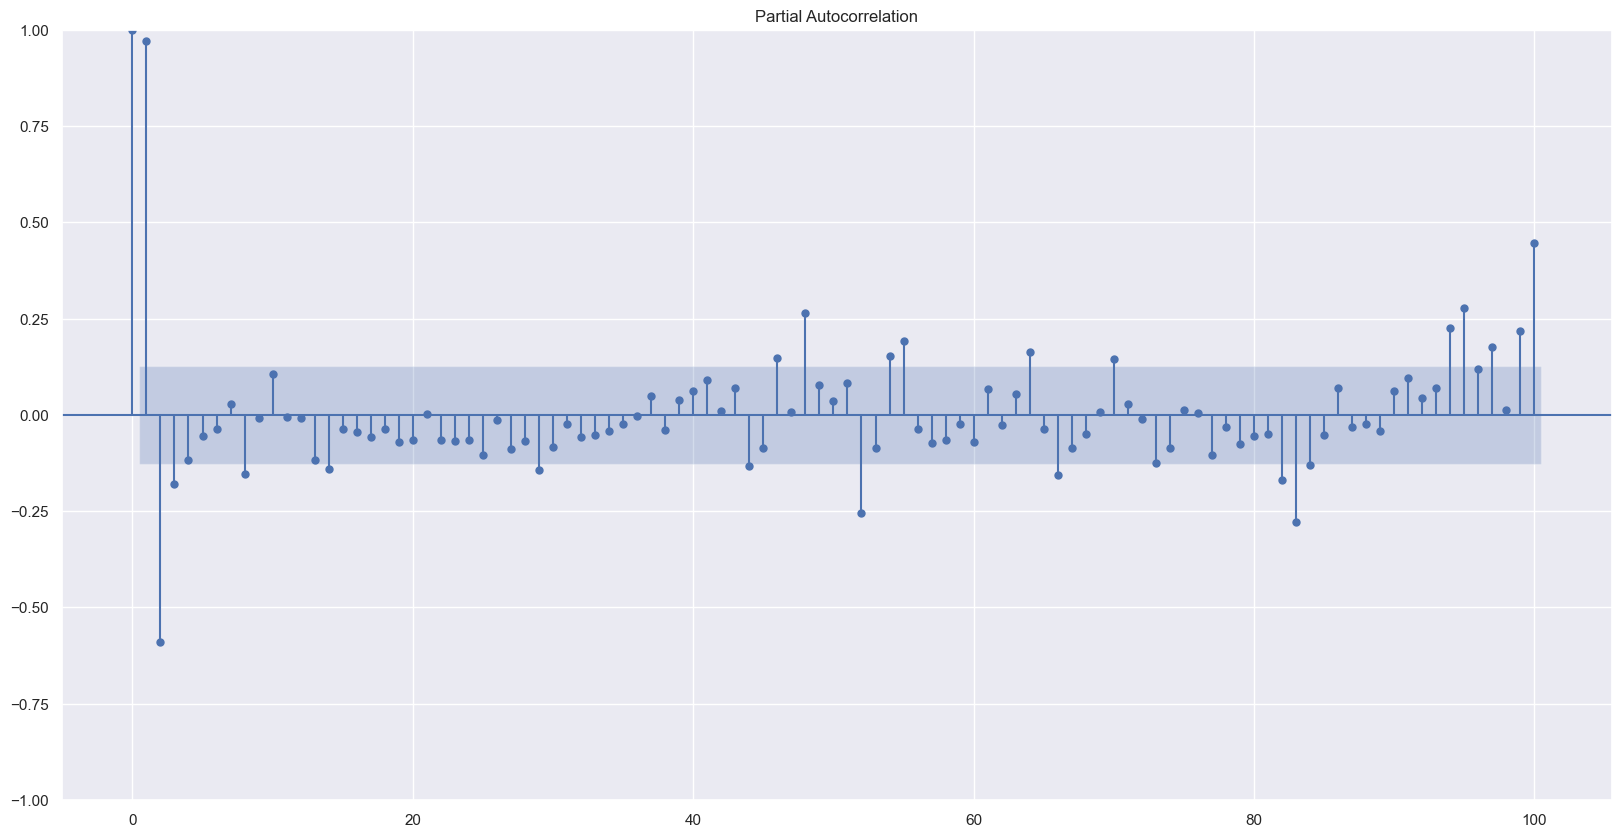

In [10]:
# plot pacf and specify the number of lags - choose p
sm.graphics.tsa.plot_pacf(df_flu_pre_COVID, lags= 100)
plt.show()

In [11]:
p = 3

# ARIMA - Pre-COVID - 1 week forecast

In [5]:
test, forecast = arima_model(df_flu_pre_COVID, weeks_to_predict = 1, p = 2, d = 0, q = 6)

Length of training set: 234
Length of test set: 1
Fitted model summary: 
                               SARIMAX Results                                
Dep. Variable:            Total Cases   No. Observations:                  234
Model:                 ARIMA(2, 0, 6)   Log Likelihood               -1589.858
Date:                Mon, 28 Nov 2022   AIC                           3199.716
Time:                        11:12:54   BIC                           3234.269
Sample:                    09-05-2015   HQIC                          3213.648
                         - 02-22-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        998.3881     43.787     22.801      0.000     912.567    1084.210
ar.L1          1.9297      0.027     71.209      0.000    

In [6]:
evaluate_model(test, forecast)

Test MSE: 19515.161
Test RMSE: 139.697
Test MAE: 139.697


# ARIMA - Pre-COVID - 2 week forecast

In [8]:
test, forecast = arima_model(df_flu_pre_COVID, weeks_to_predict = 2, p = 2, d = 0, q = 6)

Length of training set: 233
Length of test set: 2
Fitted model summary: 
                               SARIMAX Results                                
Dep. Variable:            Total Cases   No. Observations:                  233
Model:                 ARIMA(2, 0, 6)   Log Likelihood               -1582.675
Date:                Mon, 28 Nov 2022   AIC                           3185.350
Time:                        11:13:12   BIC                           3219.860
Sample:                    09-05-2015   HQIC                          3199.266
                         - 02-15-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        987.3911     39.850     24.778      0.000     909.287    1065.495
ar.L1          1.9266      0.028     69.957      0.000    

In [134]:
evaluate_model(test, forecast)

Test MSE: 244579.525
Test RMSE: 494.55
Test MAE: 467.69


# ARIMA - Pre-COVID - 3 week forecast

Length of training set: 232
Length of test set: 3
Fitted model summary: 
                               SARIMAX Results                                
Dep. Variable:            Total Cases   No. Observations:                  232
Model:                 ARIMA(2, 0, 6)   Log Likelihood               -1575.482
Date:                Sun, 27 Nov 2022   AIC                           3170.964
Time:                        21:46:10   BIC                           3205.432
Sample:                    09-05-2015   HQIC                          3184.865
                         - 02-08-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        975.2950     80.808     12.069      0.000     816.915    1133.675
ar.L1          1.9312      0.029     67.159      0.000    

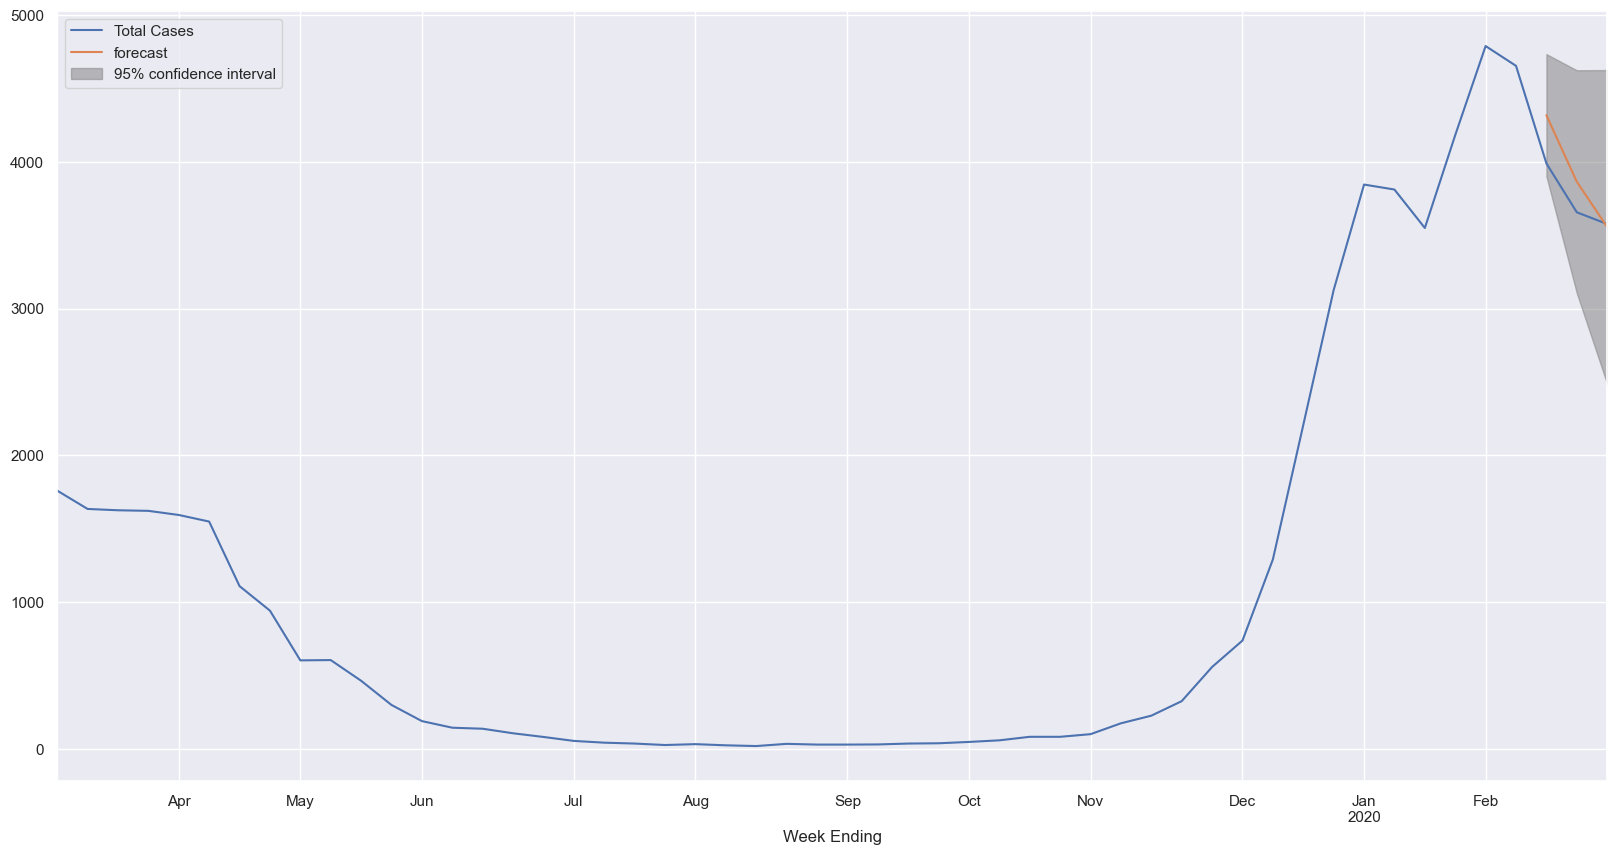

In [135]:
test, forecast = arima_model(df_flu_pre_COVID, weeks_to_predict = 3, p = 2, d = 0, q = 6)

In [136]:
evaluate_model(test, forecast)

Test MSE: 50539.367
Test RMSE: 224.81
Test MAE: 185.685


# ARIMA - Pre-COVID - 4 week forecast

Length of training set: 231
Length of test set: 4
Fitted model summary: 
                               SARIMAX Results                                
Dep. Variable:            Total Cases   No. Observations:                  231
Model:                 ARIMA(2, 0, 6)   Log Likelihood               -1567.262
Date:                Sun, 27 Nov 2022   AIC                           3154.523
Time:                        21:46:53   BIC                           3188.948
Sample:                    09-05-2015   HQIC                          3168.408
                         - 02-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        959.8015    108.274      8.865      0.000     747.588    1172.015
ar.L1          1.9376      0.029     65.745      0.000    

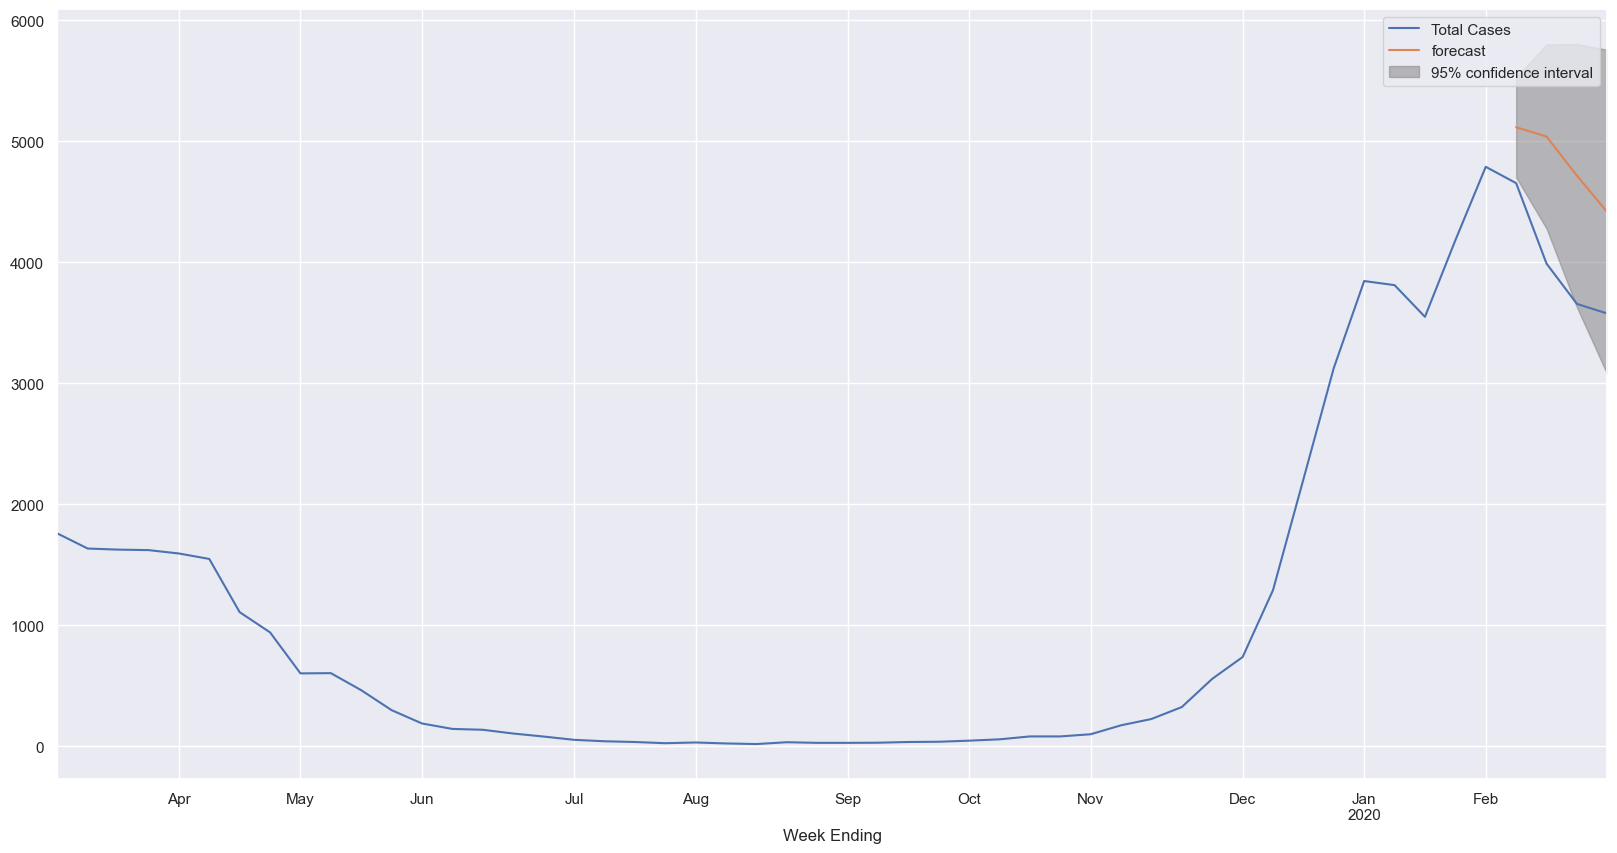

In [137]:
test, forecast = arima_model(df_flu_pre_COVID, weeks_to_predict = 4, p = 2, d = 0, q = 6)

In [138]:
evaluate_model(test, forecast)

Test MSE: 785688.536
Test RMSE: 886.391
Test MAE: 852.602


# Choosing ARIMA Parameters - Post-COVID

In [164]:
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

In [165]:
# test for stationarity - choose d
test_stationarity(df_flu)

Results of Dickey-Fuller Test:
Test Statistic                  -4.579595
p-value                          0.000141
#Lags Used                       6.000000
Number of Observations Used    369.000000
Critical Value (1%)             -3.448197
Critical Value (5%)             -2.869405
Critical Value (10%)            -2.570960
dtype: float64


In [166]:
d = 0 # time series is stationary, so don't need to apply differencing

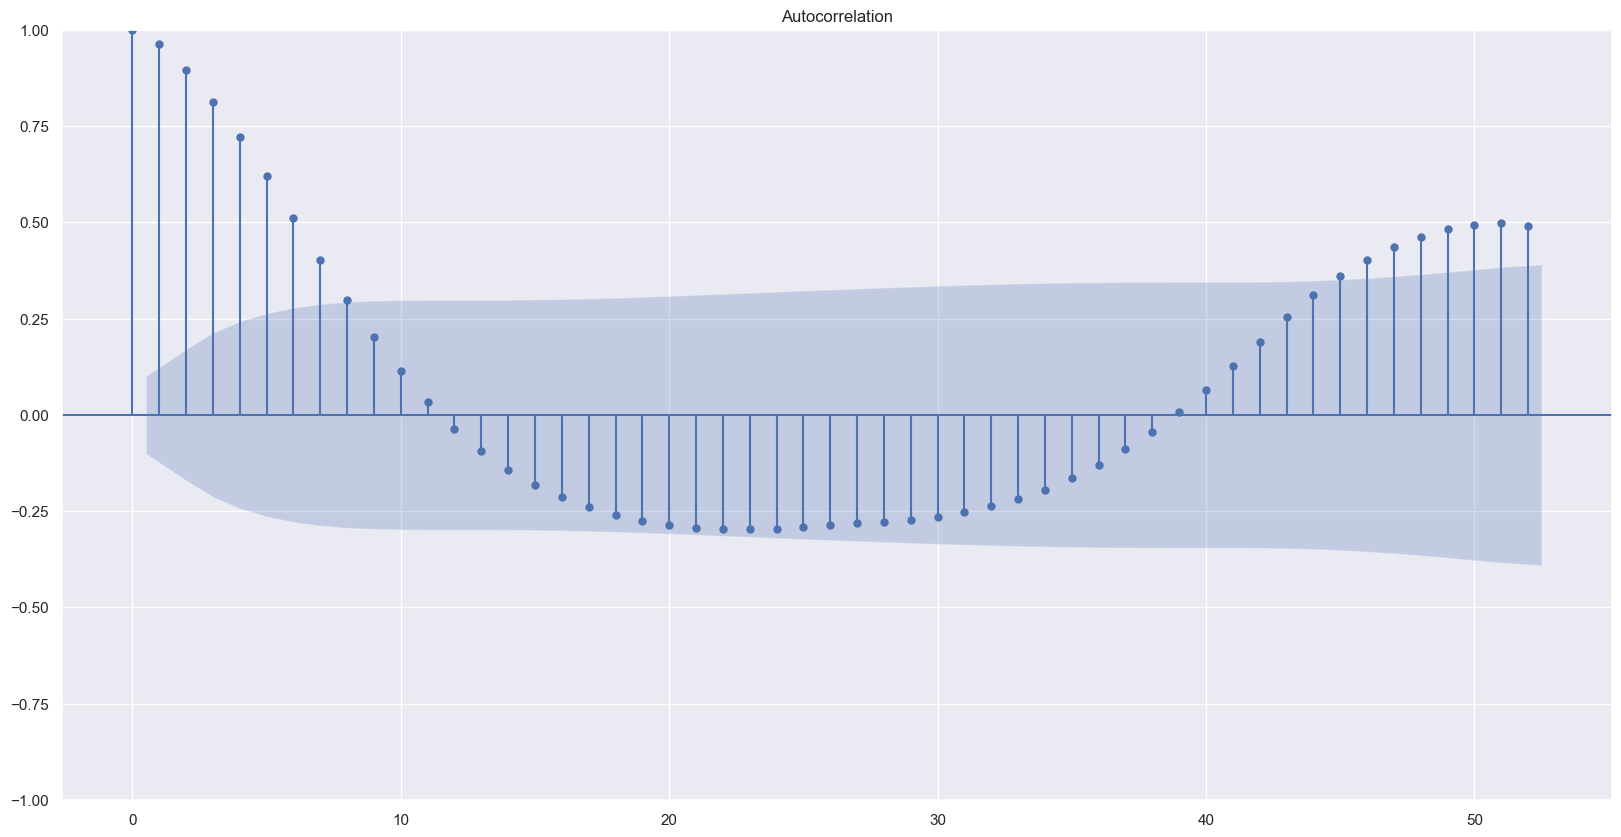

In [167]:
# plot acf and specify the number of lags - choose q
sm.graphics.tsa.plot_acf(df_flu, lags=52)
plt.show()

In [171]:
q = 7

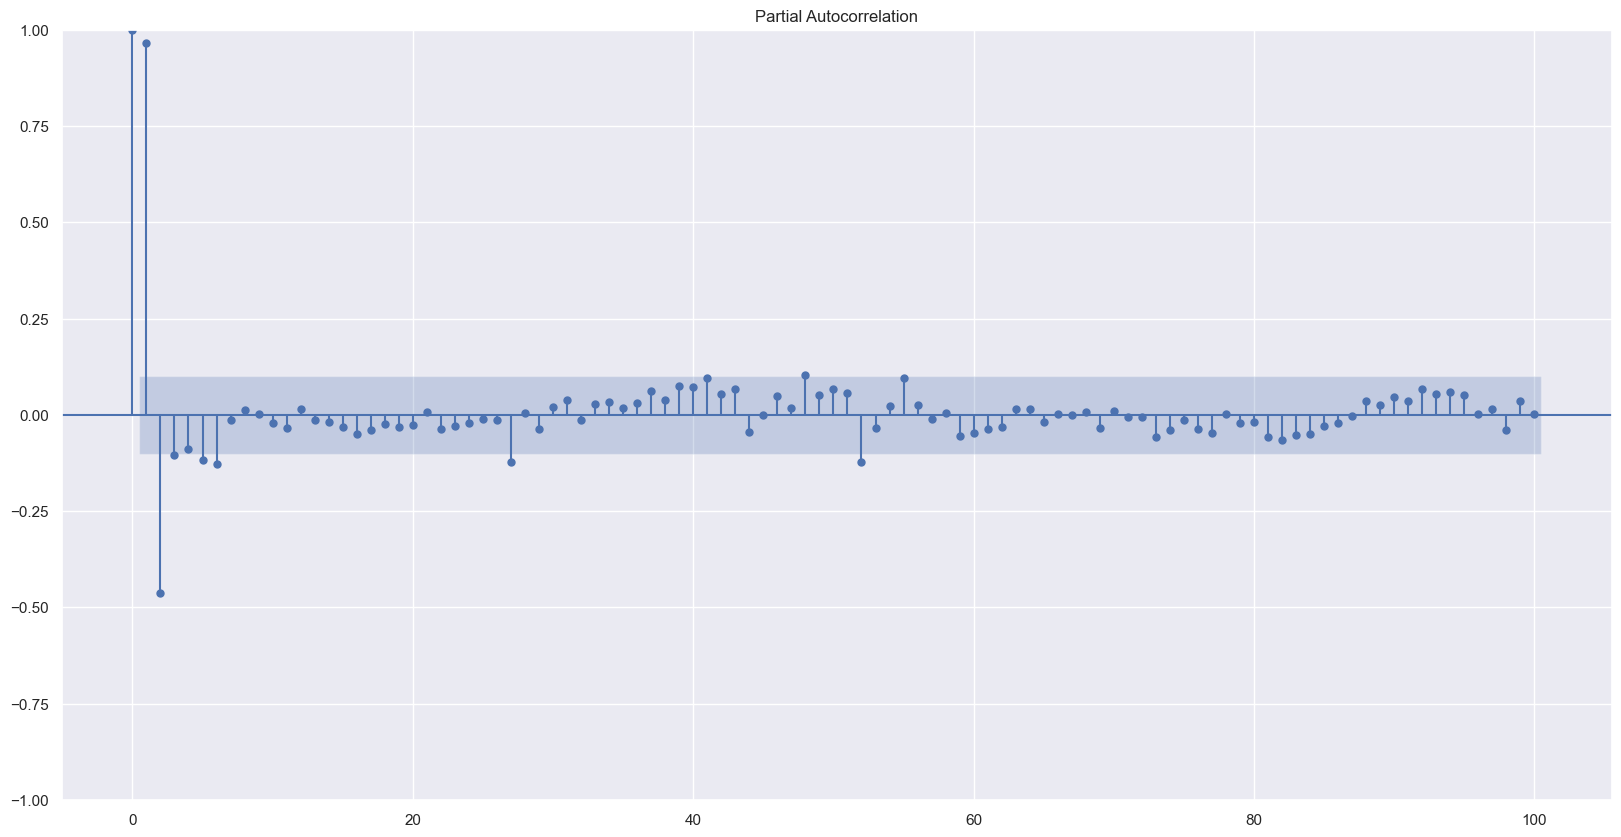

In [172]:
# plot pacf and specify the number of lags - choose p
sm.graphics.tsa.plot_pacf(df_flu, lags= 100)
plt.show()

In [175]:
p = 2

# ARIMA - Post-COVID - 1, 2, 3, 4 week forecasts

In [177]:
p = 2
d = 0
q = 7

for w in range(1,5):
    test, forecast = arima_model(df_flu, weeks_to_predict = w, p = p, d = d, q = q)
    evaluate_model(test, forecast)

Length of training set: 375
Length of test set: 1
Fitted model summary: 
                               SARIMAX Results                                
Dep. Variable:            Total Cases   No. Observations:                  375
Model:                 ARIMA(2, 0, 7)   Log Likelihood               -2507.499
Date:                Sun, 27 Nov 2022   AIC                           5036.998
Time:                        22:05:02   BIC                           5080.195
Sample:                    09-05-2015   HQIC                          5054.147
                         - 11-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        711.7053    329.578      2.159      0.031      65.744    1357.667
ar.L1          1.8708      0.105     17.849      0.000    